# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [103]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read housing_data.csv using pandas and call head() to show first few records.**

In [104]:
# add code here
data = pd.read_csv("housing_data.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [105]:
# add code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [106]:
# add code here
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [107]:
# add code here
for col in data.columns:
    print(col)

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

(array([4.20588824e-08, 1.33186461e-07, 3.89545364e-07, 6.93971560e-07,
        1.05547767e-06, 1.08852393e-06, 8.68215502e-07, 4.61646305e-07,
        1.94271981e-07, 5.90827158e-08, 1.40196275e-08]),
 array([ 200000.,  400000.,  600000.,  800000., 1000000., 1200000.,
        1400000., 1600000., 1800000., 2000000., 2200000., 2400000.]),
 <BarContainer object of 11 artists>)

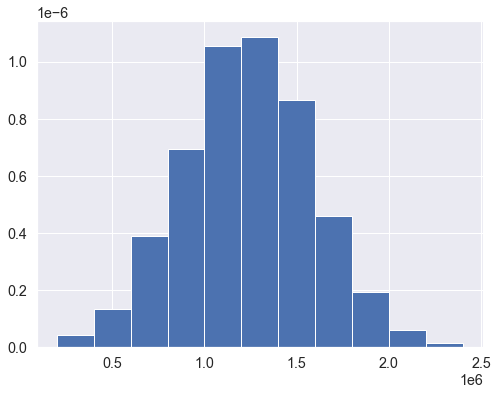

In [108]:
# add code here
# bins = [0.2e+06,0.4e+06,0.6e+06,0.8e+06,1.0e+06,1.2e+06,1.4e+06,1.6e+06,1.8e+06,2.0e+06,2.2e+06,2.4e+06,2.6e+06]
bins = np.arange(start = 0.2e+06,stop=2.6e+06,step = 0.2e+06)
fig = plt.figure(figsize=(8,6))
plt.hist(data["Price"],bins=bins,density=True)

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

                              Avg. Area Income  Avg. Area House Age  \
Avg. Area Income                      1.000000            -0.002007   
Avg. Area House Age                  -0.002007             1.000000   
Avg. Area Number of Rooms            -0.011032            -0.009428   
Avg. Area Number of Bedrooms          0.019788             0.006149   
Area Population                      -0.016234            -0.018743   
Price                                 0.639734             0.452543   

                              Avg. Area Number of Rooms  \
Avg. Area Income                              -0.011032   
Avg. Area House Age                           -0.009428   
Avg. Area Number of Rooms                      1.000000   
Avg. Area Number of Bedrooms                   0.462695   
Area Population                                0.002040   
Price                                          0.335664   

                              Avg. Area Number of Bedrooms  Area Population  \
Avg. Area

<AxesSubplot:>

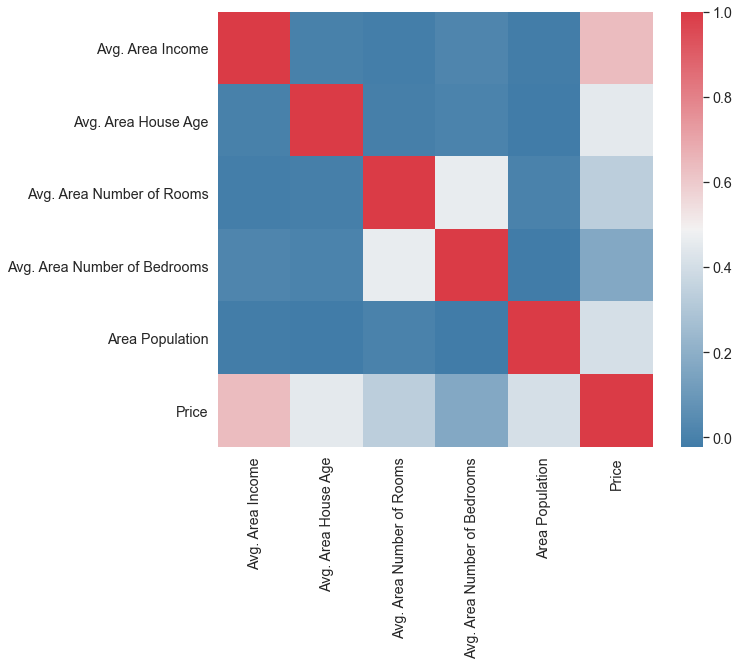

In [109]:
# add code here
fig, axes = plt.subplots(figsize=(10,8))
corr = data.corr()
print(corr)
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=axes)

### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [110]:
# add code here
print(data.columns)
X = data.drop(["Address","Price"],axis=1)
y = data["Price"]

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


In [111]:
# This code should print (5000, 5) and (5000,) if everything is correct
print(X.shape)
y.shape

(5000, 5)


(5000,)

In [112]:
# print a few record of X
# add code here
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [113]:

# print a few record of y
# add code here
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

### Test-train split

**Import train_test_split function from scikit-learn**

In [114]:
# add code here
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [115]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [116]:
# add code here
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 5)
(1500, 5)
(3500,)
(1500,)


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [117]:
# add code for imports here
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here
lm = LinearRegression()


**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [118]:
# add code here
lm.fit(X_train,y_train)

LinearRegression()

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [119]:
# add code here
predictions = lm.predict(X_test)
print(type(predictions))
predictions.shape

<class 'numpy.ndarray'>


(1500,)

**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

<AxesSubplot:ylabel='Price'>

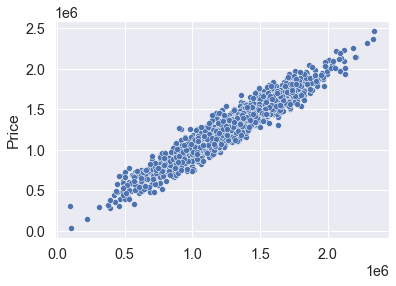

In [120]:
# add code here
sns.scatterplot(x=predictions, y=y_test)

**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [121]:
# add code here
r2_score(y_test,predictions)

0.9200757649412081

# 2) K-nearest neighbor Classification

### Import packages and dataset

In [122]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [123]:
# add code here
df = pd.read_csv('classified_data.txt', sep=",",index_col=0, header=0)
df.head()


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [124]:
# add code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [125]:
# add code here
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [126]:
# add code here
cols = df.columns
print(cols)

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

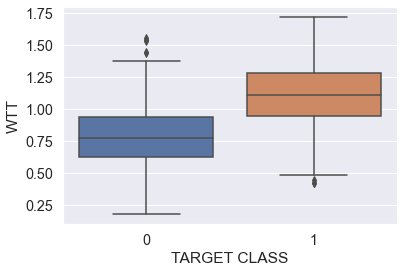

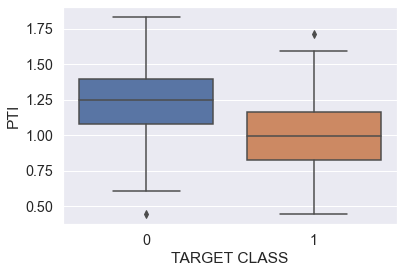

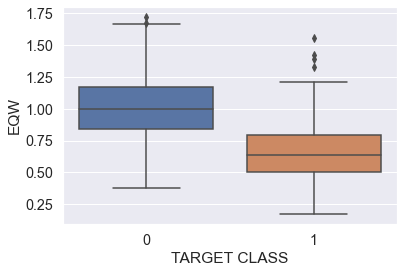

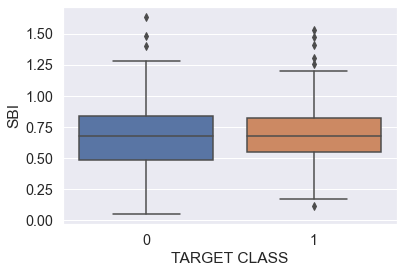

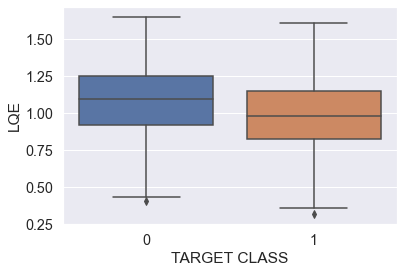

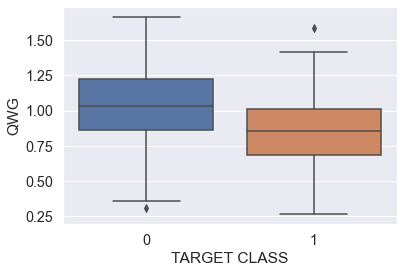

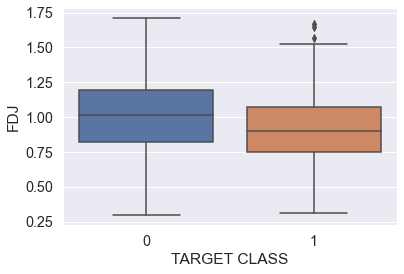

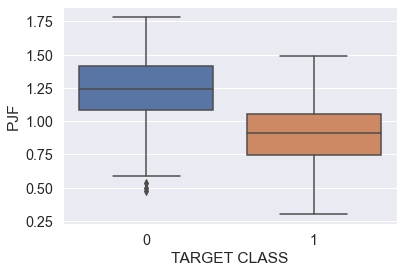

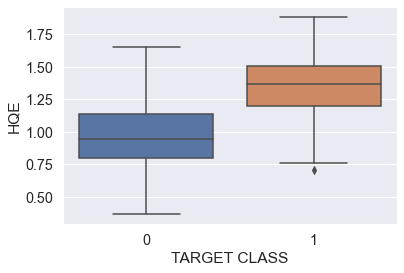

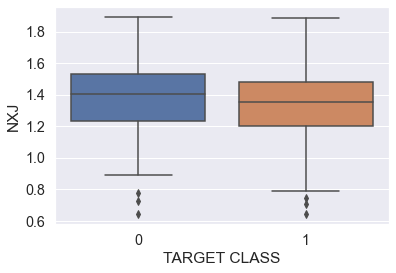

In [127]:
# add code here
for i in range(len(cols)-1):
    plt.figure()
    sns.boxplot(x='TARGET CLASS',y=cols[i],data=df)

### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [128]:
# add code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [129]:
# add code here
X = df.drop(["TARGET CLASS"],axis=1)
scaler.fit(X)
scaled_data = scaler.transform(X)

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [130]:
# add code here
df_feat = pd.DataFrame(data=scaled_data,columns = X.columns )
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [131]:
# add code here
X = df_feat
y = df["TARGET CLASS"]

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [132]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [133]:
# add code here
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [134]:
# add code here
pred = classifier.predict(X_test)
print(pred)

[1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0
 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1]


**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [135]:
# add code here
from sklearn.metrics import classification_report
result = classification_report(y_test, pred,output_dict=True)

**Print the accuracy using numpy and round it to 3 decimal places.**

In [136]:
# add code here
acc = round(result["accuracy"],3)
print(f"accuracy: {acc}")


accuracy: 0.897


### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [137]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list
def k_neighbor_model(n,X_train,y_train,X_test,y_test):
    classifier = KNeighborsClassifier(n_neighbors=n)
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    result = classification_report(y_test, pred,output_dict=True)
    return result["accuracy"]
# add code here
accuracies = []
for i in range(1,61):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    result = classification_report(y_test, pred,output_dict=True)
    accuracies.append(round(result["accuracy"],3))

**Plot a graph of K value vs Accuracy**

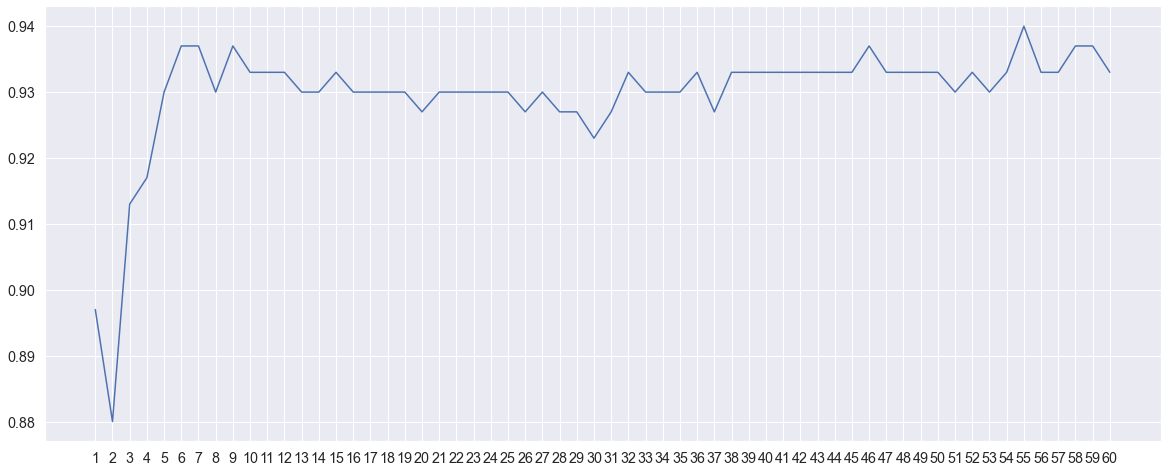

In [138]:
# add code here
# print(max(accuracies))
# print(np.arange(1,61))

fig = plt.figure(figsize = (20,8))
plt.xticks(np.arange(1,61))
plt.plot(np.arange(1,61),accuracies)


**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [139]:
# add code here 
print("argmax returns the index of the highest value in the array, therefore we add 1 to the result.")
print("The best value of n_neighbours is " + str(np.argmax(accuracies)+1) 
      + " with accuracy: " + str(accuracies[np.argmax(accuracies)]))


argmax returns the index of the highest value in the array, therefore we add 1 to the result.
The best value of n_neighbours is 55 with accuracy: 0.94


# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [140]:
#write code here
data = pd.read_csv("titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [141]:
import re

def normalize(df,col):
#     name = col + "_normalize"
    df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())
    
def titanic_preprocessing_pipeline(df):
  #enter preprocessing steps as done in task 1
  #make sure the preprocessed dataframe looks like the output in task 1
  #return the dataframe
    df_copy = df.copy()
#     df_copy = df_copy.reset_index()
    title_col = []
    for name in df_copy["Name"]:
        title_search = re.search('(\w+)\.', name) 
        if title_search:
          title = title_search.group(1)
          title_col.append(title)

    df_copy["Title"] = title_col
    df_copy.drop(["Name","PassengerId","Ticket"],axis=1,inplace=True)
    df_copy["Embarked"].fillna(df_copy["Embarked"].mode()[0],inplace=True)
    df_copy["Age"].fillna(df_copy["Age"].mean(),inplace=True)
    perc = 50.0
    min_count =  int(((100-perc)/100)*df_copy.shape[0] + 1)
    df_copy.dropna(axis=1, thresh=min_count,inplace=True)
    df_copy["Family_members"] = df_copy["SibSp"] + df_copy["Parch"]
    df_copy.drop(["SibSp","Parch"],axis=1,inplace=True)
    array = ["Age","Fare","Family_members"]
    for col in array:
        normalize(df_copy,col)
    array = ["Pclass","Sex","Title","Embarked"]
    for col in array:
        dummy = pd.get_dummies(df_copy[col])
        df_copy = pd.merge(
            left=df_copy,
            right=dummy,
            left_index=True,
            right_index=True,
        )
    df_copy.drop(array,axis=1,inplace=True)
    
    return df_copy

new_df = titanic_preprocessing_pipeline(data)
new_df.head()

,Survived,Age,Fare,Family_members,1,2,3,female,male,Capt,...,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,C,Q,S
0,0,0.271174,0.014151,0.1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,0.139136,0.1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0.015469,0.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,0.103644,0.1,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0.015713,0.0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [142]:
#write code here
y_true = new_df["Survived"]

<b>remove the y_label (survived) from the dataframe</b>

In [143]:
#write code here
new_df.drop(["Survived"],inplace=True,axis=1)

<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [144]:
#write code here
X_train, X_test, y_train, y_test = train_test_split(new_df,y_true,test_size=0.3,random_state=0)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [145]:
#write code here
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy",
                             splitter="random",
                             max_depth=6,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             random_state=0)
# print(X_train.info())
clf.fit(X_train, y_train)
train_preds = clf.predict(X_train)
test_preds = clf.predict(X_test)


Text(26.5, 0.5, 'True Label')

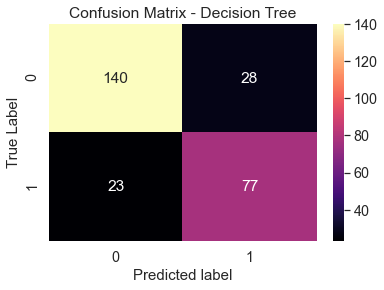

<Figure size 720x504 with 0 Axes>

In [146]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_preds)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)


<b>print the test accuracy and train accuracy here</b>

In [147]:
#write code here

print("train Accuracy:",metrics.accuracy_score(y_train, train_preds))
print("test Accuracy:",metrics.accuracy_score(y_test, test_preds))

train Accuracy: 0.85553772070626
test Accuracy: 0.8097014925373134


In [148]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = np.arange(10,101,10)
# print(n_estimators)
for n in n_estimators:
    rf = RandomForestRegressor(n_estimators=n,max_depth=6,random_state=0)
    rf.fit(X_train,y_train)
    rf_train_preds = rf.predict(X_train)
    rf_test_preds = rf.predict(X_test)
    rf_test_preds = rf_test_preds>0.5
    rf_train_preds = rf_train_preds>0.5

rf = RandomForestRegressor(n_estimators=80,max_depth=6,random_state=0)
rf.fit(X_train,y_train)
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)
rf_test_preds = rf_test_preds>0.5
rf_train_preds = rf_train_preds>0.5
print("train Accuracy:",metrics.accuracy_score(y_train, rf_train_preds))
print("test Accuracy:",metrics.accuracy_score(y_test, rf_test_preds))

train Accuracy: 0.884430176565008
test Accuracy: 0.832089552238806


Text(26.5, 0.5, 'True Label')

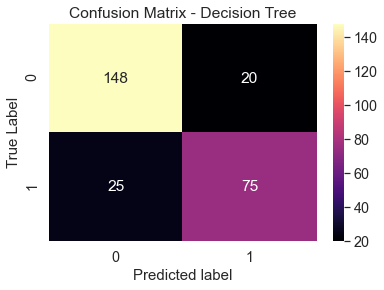

<Figure size 720x504 with 0 Axes>

In [149]:
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            rf_test_preds)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)

In [150]:
from xgboost import XGBRegressor

n_estimators=[50,100,150,200,250,300,350,400,450,500]
learning_rate=[0.001,0.01,0.05,0.1,0.5,0.75,1.0]
stopping_rounds = [1,2,5,10,20,40,80,100]
for i in n_estimators:
    for j in learning_rate:
        for k in stopping_rounds:
            xgb_model  = XGBRegressor(n_estimators=i,learning_rate=j)

            xgb_mod = xgb_model.fit(X_train,y_train,
                                   eval_set = [(X_test, y_test)],
                                    early_stopping_rounds=k,
                                    verbose=0
                                   )
            xgb_pred = xgb_mod.predict(X_test)

            xgb_pred = xgb_pred>0.65

            report = classification_report(y_test,xgb_pred,output_dict=True)
            acc = report["accuracy"]
            print(f"n={i} lr={j} sr={k} accuracy: {acc}")

C:\Users\admin\anaconda3\envs\bankruptcy\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


n=50 lr=0.001 sr=1 accuracy: 0.6268656716417911
n=50 lr=0.001 sr=2 accuracy: 0.6268656716417911
n=50 lr=0.001 sr=5 accuracy: 0.6268656716417911
n=50 lr=0.001 sr=10 accuracy: 0.6268656716417911
n=50 lr=0.001 sr=20 accuracy: 0.6268656716417911
n=50 lr=0.001 sr=40 accuracy: 0.6268656716417911
n=50 lr=0.001 sr=80 accuracy: 0.6268656716417911
n=50 lr=0.001 sr=100 accuracy: 0.6268656716417911
n=50 lr=0.01 sr=1 accuracy: 0.753731343283582
n=50 lr=0.01 sr=2 accuracy: 0.753731343283582
n=50 lr=0.01 sr=5 accuracy: 0.753731343283582
n=50 lr=0.01 sr=10 accuracy: 0.753731343283582
n=50 lr=0.01 sr=20 accuracy: 0.753731343283582
n=50 lr=0.01 sr=40 accuracy: 0.753731343283582
n=50 lr=0.01 sr=80 accuracy: 0.753731343283582
n=50 lr=0.01 sr=100 accuracy: 0.753731343283582
n=50 lr=0.05 sr=1 accuracy: 0.8246268656716418
n=50 lr=0.05 sr=2 accuracy: 0.832089552238806
n=50 lr=0.05 sr=5 accuracy: 0.832089552238806
n=50 lr=0.05 sr=10 accuracy: 0.832089552238806
n=50 lr=0.05 sr=20 accuracy: 0.832089552238806
n=5

n=200 lr=0.001 sr=10 accuracy: 0.6268656716417911
n=200 lr=0.001 sr=20 accuracy: 0.6268656716417911
n=200 lr=0.001 sr=40 accuracy: 0.6268656716417911
n=200 lr=0.001 sr=80 accuracy: 0.6268656716417911
n=200 lr=0.001 sr=100 accuracy: 0.6268656716417911
n=200 lr=0.01 sr=1 accuracy: 0.8097014925373134
n=200 lr=0.01 sr=2 accuracy: 0.8134328358208955
n=200 lr=0.01 sr=5 accuracy: 0.8134328358208955
n=200 lr=0.01 sr=10 accuracy: 0.8134328358208955
n=200 lr=0.01 sr=20 accuracy: 0.8134328358208955
n=200 lr=0.01 sr=40 accuracy: 0.8134328358208955
n=200 lr=0.01 sr=80 accuracy: 0.8134328358208955
n=200 lr=0.01 sr=100 accuracy: 0.8134328358208955
n=200 lr=0.05 sr=1 accuracy: 0.8246268656716418
n=200 lr=0.05 sr=2 accuracy: 0.832089552238806
n=200 lr=0.05 sr=5 accuracy: 0.832089552238806
n=200 lr=0.05 sr=10 accuracy: 0.832089552238806
n=200 lr=0.05 sr=20 accuracy: 0.832089552238806
n=200 lr=0.05 sr=40 accuracy: 0.832089552238806
n=200 lr=0.05 sr=80 accuracy: 0.832089552238806
n=200 lr=0.05 sr=100 accu

n=350 lr=0.001 sr=40 accuracy: 0.6268656716417911
n=350 lr=0.001 sr=80 accuracy: 0.6268656716417911
n=350 lr=0.001 sr=100 accuracy: 0.6268656716417911
n=350 lr=0.01 sr=1 accuracy: 0.8097014925373134
n=350 lr=0.01 sr=2 accuracy: 0.8208955223880597
n=350 lr=0.01 sr=5 accuracy: 0.8208955223880597
n=350 lr=0.01 sr=10 accuracy: 0.8208955223880597
n=350 lr=0.01 sr=20 accuracy: 0.8208955223880597
n=350 lr=0.01 sr=40 accuracy: 0.8208955223880597
n=350 lr=0.01 sr=80 accuracy: 0.8208955223880597
n=350 lr=0.01 sr=100 accuracy: 0.8208955223880597
n=350 lr=0.05 sr=1 accuracy: 0.8246268656716418
n=350 lr=0.05 sr=2 accuracy: 0.832089552238806
n=350 lr=0.05 sr=5 accuracy: 0.832089552238806
n=350 lr=0.05 sr=10 accuracy: 0.832089552238806
n=350 lr=0.05 sr=20 accuracy: 0.832089552238806
n=350 lr=0.05 sr=40 accuracy: 0.832089552238806
n=350 lr=0.05 sr=80 accuracy: 0.832089552238806
n=350 lr=0.05 sr=100 accuracy: 0.832089552238806
n=350 lr=0.1 sr=1 accuracy: 0.8208955223880597
n=350 lr=0.1 sr=2 accuracy: 0

n=500 lr=0.001 sr=100 accuracy: 0.7574626865671642
n=500 lr=0.01 sr=1 accuracy: 0.8097014925373134
n=500 lr=0.01 sr=2 accuracy: 0.8208955223880597
n=500 lr=0.01 sr=5 accuracy: 0.8208955223880597
n=500 lr=0.01 sr=10 accuracy: 0.8208955223880597
n=500 lr=0.01 sr=20 accuracy: 0.8208955223880597
n=500 lr=0.01 sr=40 accuracy: 0.8208955223880597
n=500 lr=0.01 sr=80 accuracy: 0.8208955223880597
n=500 lr=0.01 sr=100 accuracy: 0.8208955223880597
n=500 lr=0.05 sr=1 accuracy: 0.8246268656716418
n=500 lr=0.05 sr=2 accuracy: 0.832089552238806
n=500 lr=0.05 sr=5 accuracy: 0.832089552238806
n=500 lr=0.05 sr=10 accuracy: 0.832089552238806
n=500 lr=0.05 sr=20 accuracy: 0.832089552238806
n=500 lr=0.05 sr=40 accuracy: 0.832089552238806
n=500 lr=0.05 sr=80 accuracy: 0.832089552238806
n=500 lr=0.05 sr=100 accuracy: 0.832089552238806
n=500 lr=0.1 sr=1 accuracy: 0.8208955223880597
n=500 lr=0.1 sr=2 accuracy: 0.8097014925373134
n=500 lr=0.1 sr=5 accuracy: 0.8097014925373134
n=500 lr=0.1 sr=10 accuracy: 0.8097

In [151]:
# Catboost Classifier
from catboost import CatBoostClassifier
cat = CatBoostClassifier(loss_function = 'Logloss',
                        eval_metric = 'BalancedAccuracy',
                        verbose = 200,
                        random_seed = 20)

cat_mod = cat.fit(X_train,y_train,
                   eval_set = (X_test,y_test),
                   use_best_model=True,
                   verbose = 0,
                    plot=False)
                  
cat_preds = cat_mod.predict(X_test)


In [152]:
report = classification_report(y_test, cat_preds,output_dict=True)
acc = report["accuracy"]
print(f"accuracy: ",acc)

accuracy:  0.8395522388059702


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators=[50,100,150,200,250,300,350,400,450,500]
learning_rate=[0.001,0.01,0.05,0.1,0.5,0.75,1.0]
for i in n_estimators:
    for j in learning_rate:
        ada = AdaBoostClassifier(n_estimators=i,learning_rate=j)
        ada.fit(X_train,y_train)
        ada_preds = ada.predict(X_test)
        report = classification_report(y_test, ada_preds,output_dict=True)
        acc = report["accuracy"]
        print(f"n={i} lr={j} accuracy: {acc}")
    print("="*50)


n=50 lr=0.001 accuracy: 0.7761194029850746
n=50 lr=0.01 accuracy: 0.7761194029850746
n=50 lr=0.05 accuracy: 0.7910447761194029
n=50 lr=0.1 accuracy: 0.7985074626865671
n=50 lr=0.5 accuracy: 0.8283582089552238
n=50 lr=0.75 accuracy: 0.8246268656716418
n=50 lr=1.0 accuracy: 0.8134328358208955
n=100 lr=0.001 accuracy: 0.7761194029850746
n=100 lr=0.01 accuracy: 0.7686567164179104
n=100 lr=0.05 accuracy: 0.7985074626865671
n=100 lr=0.1 accuracy: 0.8246268656716418
n=100 lr=0.5 accuracy: 0.8246268656716418
n=100 lr=0.75 accuracy: 0.8208955223880597
n=100 lr=1.0 accuracy: 0.8171641791044776
n=150 lr=0.001 accuracy: 0.7761194029850746
n=150 lr=0.01 accuracy: 0.7686567164179104
n=150 lr=0.05 accuracy: 0.8246268656716418
n=150 lr=0.1 accuracy: 0.8283582089552238
n=150 lr=0.5 accuracy: 0.8208955223880597
n=150 lr=0.75 accuracy: 0.8208955223880597
n=150 lr=1.0 accuracy: 0.8208955223880597
n=200 lr=0.001 accuracy: 0.7761194029850746
n=200 lr=0.01 accuracy: 0.7686567164179104
n=200 lr=0.05 accuracy: